# This is a tutorial

## Libraries

In [318]:
import pandas as pd
import numpy as np
import warnings
import re
import seaborn as sns #pip install seaborn
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from IPython.display import Image, display, HTML #pip install ipython

# Imports for Step 4
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

## Step 1: Data Collection
In this step, we will gather interested data to explore. <br>
Source links: (for the csv files, check out this repository...)<br>
[1]https://ourworldindata.org/child-maltreatment-and-educational-outcomes <br>
[2]https://www.kaggle.com/datasets/jessemostipak/college-tuition-diversity-and-pay <br>
[3]https://nces.ed.gov/programs/coe/indicator/cpb/college-enrollment-rate#:~:text=The%20overall%20college%20enrollment%20rate%20of%2018%2D%20to%2024%2Dyear,%2D%20or%204%2Dyear%20institutions <br>
[4]https://www.kaggle.com/datasets/shariful07/student-mental-health <br>
[5]https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success <br>
[6]https://nces.ed.gov/programs/coe/indicator/a01/violent-deaths-and-shootings <br>
[7]https://research.com/education/college-drug-abuse-statistics <br>

In [319]:
df_children_work = pd.read_csv('working-children-out-of-school-ages-7-14-vs-hours-worked-by-children-ages-7-14.csv')
df_usa_salary_potential = pd.read_csv('usa_salary_potential.csv')
df_usa_college_enroll_rate = pd.read_csv('usa_college_enroll_rate.csv')
df_usa_college_enroll_rate_enthnicity = pd.read_csv('usa_college_enroll_rate_ethnicity.csv')
df_malaysia_student_mental_health = pd.read_csv('malaysia_student_mental_health.csv')
df_usa_youth_violence_history = pd.read_csv('usa_youth_violence_history.csv')
df_drug_abuse_reasons = pd.read_csv('drug_abuse_top_reasons.csv')
df_europe_students = pd.read_csv('europe_college_student_data.csv', sep=';')

In [320]:
#If you want to see the whole table without the '...', you can use the following.
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.max_rows', None)     # Show all rows

#If this is too much data, you can reset back to default (recommended).
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_rows')

def showTable(df, name):
    display(HTML(f"<div style='text-align:center;'><h4>{name}</h4></div>"))
    if name is not None:
        display(df)

Brief: Children working hours will be the data from various countries. Source organization https://ourworldindata.org/

In [321]:
#showTable(df_children_work, 'Working children out of school vs. hours worked by children (age 7-14)')

Brief: Perhaps money is one thing that attracts people to go to universities. It is one of the motivations that drive students to persue higher education. Source organization https://www.kaggle.com/

In [322]:
#showTable(df_usa_salary_potential, 'Potential Salary for College Graduates (USA)')

Brief: We would like to see college enrollment rate and enthnicity rate because knowing this could help us understand more about students' identity and see part of the college environment. Since the United States is a culturally diverse country, student diversity will be an interesting factor to consider. You can exlpore more details on your own. Source organization https://nces.ed.gov/

In [323]:
#showTable(df_usa_college_enroll_rate, 'USA College Enroll Rate 2010 - 2021 for ages 18 to 24')
#showTable(df_usa_college_enroll_rate_enthnicity, 'USA College Enroll Rate 2010 - 2021 Ethnicity ages 18 to 24')

Brief: While students are in school, mental health could be an issue. Maybe it is because they want to work hard to get a good job, or to achieve something. The stress level in different courses could be an indicator of this. Here, we found data from International Islamic University Malaysia in year 2020 to show case this. (We are interested in age, course, and mental state.) Source organization https://www.kaggle.com/

In [324]:
#showTable(df_malaysia_student_mental_health, 'Student Mental Health in International Islamic University Malaysia in year 2020')

Brief: We would also like to explore the violence from age 5 to 18. While the datasets for mental health and violence we have here are completely different from each other, we thought that since violence will get announced and spread across media, like school shootings in the U.S, so people might get worried or panic. From the statistic point of view, this dataset from the National Center for Education could let us see the number of violences. From the emotion point of view, we could 'start' to see students' view of violence. For more details, you would need to explore on your own. Source organization https://nces.ed.gov/

In [325]:
#showTable(df_usa_youth_violence_history, 'Violent Deaths at School and Away From School and School Shootings in USA (age 5-18)')

Brief: Drug abuse. This is a direct cause to education performance in common sense. Because it became common sense, we would like to know why. Here is a student dataset from the University of Sao Paulo to show this. Source organization https://research.com/

In [326]:
#showTable(df_drug_abuse_reasons, 'Common Reasons for Drug Abuse')

Brief: We found a dataset that includes information of European college students. Source organization https://archive-beta.ics.uci.edu/

In [327]:
#showTable(df_europe_students, 'Europe College Student Info')

Still alive? Keep reading.

## Step 2: Data Processing
Many times, the data we got is messy. In this process, we will clean some data. Check for NaN values and duplicate rows first. Drop uneccessary columns, and maybe change the column name if needed.

In [328]:
#df.columns
def peekData(df):
    print('---------------------------------------------------')
    print('Table NaN values count for each column\n') 
    print(df.isna().sum(), '\n')
    print('Table duplicated rows count', df.duplicated().sum(), '\n')
    print(df.info())
    print('---------------------------------------------------')

In [329]:
#peekData(df_children_work)

Observed: For the children work dataset, there are quite a lot of NaN values, so doing something like imputation won't work. In this case, we are interested in Entity, year, population, and child work hours. So, we can drop the rows that has NaN values in these columns to then see what result we get. Also, the column name is too long, so we will shorten the name.

In [330]:
#Don't need Continent and Code column, drop it.
df_children_work.drop(columns=['Continent'], inplace=True)

df_children_work.rename(
    columns={'Entity': 'Country',
             'Children in employment, work only (% of children in employment, ages 7-14)': 'Work_only_pct', 
             'Average working hours of children, study and work, ages 7-14 (hours per week)': 'Work_avg',
             'Population (historical estimates)': 'Population'}, 
    inplace=True
)

df_children_work[(df_children_work['Year'] >= 1999) & (df_children_work['Year'] <= 2016)]

df_children_work = df_children_work.dropna(subset=['Work_only_pct', 'Work_avg', 'Population'])

#if you want to double check, uncomment this line.
#peekData(df_children_work) 

#df_children_work.head()

In [331]:
#peekData(df_usa_salary_potential)

Observed: For the USA college graduate postential salary, we care about the pay, so we will drop the irrelevant column "make_world_better_percent".

In [332]:
df_usa_salary_potential = df_usa_salary_potential.drop(columns=['make_world_better_percent'])
df_usa_salary_potential = df_usa_salary_potential.drop_duplicates(keep='last') #keep only one of the duplicated rows.
df_usa_salary_potential.head()

,rank,name,state_name,early_career_pay,mid_career_pay,stem_percent
0,1,Auburn University,Alabama,54400,104500,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,45
2,3,The University of Alabama,Alabama,52300,97400,15
3,4,Tuskegee University,Alabama,54500,93500,30
4,5,Samford University,Alabama,48400,90500,3


In [333]:
#peekData(df_usa_college_enroll_rate)
#peekData(df_usa_college_enroll_rate_enthnicity)

Observed: From the US college enroll and ethnicity rate table, we will get rid of the NaN values and then the last 2 rows (we can see why from Step 1 Data Collection). The column names look clean and the overall table is small. Easy to process :)

In [334]:
df_usa_college_enroll_rate_enthnicity = df_usa_college_enroll_rate_enthnicity.copy()
df_usa_college_enroll_rate = df_usa_college_enroll_rate.iloc[:-2, :-1] #get rid of last 2 rows and last column
df_usa_college_enroll_rate_enthnicity = df_usa_college_enroll_rate_enthnicity.iloc[:-2,:-1]

df_usa_college_enroll_rate_enthnicity.rename(
    columns = {
        'Race/ethnicity': 'Race',
        '2010-Standard Error': '2010-std-error',
        '2021-Standard Error': '2021-std-error'
    },
    inplace = True
)

#uncomment to double check
display(df_usa_college_enroll_rate.head())
display(df_usa_college_enroll_rate_enthnicity.head())

,Year,Total,Total-Standard Error,2-year,2-year-Standard Error,4-year,4-year-Standard Error
0,2010,41.177719,0.57109,12.947770,0.35693,28.229949,0.52859
1,2011,41.980005,0.59478,12.027942,0.35291,29.952062,0.58025
2,2012,41.005519,0.61841,12.714605,0.38412,28.290914,0.57706
3,2013,39.934162,0.62776,11.593688,0.35690,28.340474,0.56849
4,2014,40.034789,0.65115,10.632735,0.39864,29.402053,0.60986


,Race,2010,2010-std-error,2021,2021-std-error
0,Total,41.177719,0.57109,38.056244,0.652770
1,American Indian/Alaska Native,41.375935,6.59728,28.361443,6.373455
2,Asian,63.611214,2.69639,60.475638,2.857108
3,Black,38.440417,1.65739,36.694730,1.853708
4,Hispanic,31.911062,1.15244,33.434163,1.356797


In [335]:
peekData(df_malaysia_student_mental_health)

---------------------------------------------------
Table NaN values count for each column

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64 

Table duplicated rows count 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 n

Observed: In the student mental health dataset, since there is only 1 missing value in the age column, probablly missing at random. We can take the age mean to fill the NaN value. Also, I would change the column names. The timestamp here does not interest us because it is only 2-3 months data in year 2020 (not wide enough), thus drop it. We will be interested in the servey question answers.

In [336]:
#Filling age with mean 
df_malaysia_student_mental_health["Age"].fillna(round(df_malaysia_student_mental_health["Age"].mean()),inplace=True)

#get rid of not interested columns
df_malaysia_student_mental_health.drop(columns=['Timestamp', 'Choose your gender', 'Marital status', 'Your current year of Study'], inplace=True)

#rename long column names
df_malaysia_student_mental_health.rename(
    columns = {
        'What is your course?': 'Course', 
        'What is your CGPA?': 'CGPA', 
        'Do you have Depression?': 'Depression', 
        'Do you have Anxiety?': 'Anxiety',
        'Do you have Panic attack?': 'Panic_attack', 
        'Did you seek any specialist for a treatment?': 'Treatment'}, 
    inplace = True
)

# Convert "yes" and "no" to 1 and 0
df_malaysia_student_mental_health['Depression'] = df_malaysia_student_mental_health['Depression'].apply(lambda x: 1 if x == 'Yes' else 0)
df_malaysia_student_mental_health['Anxiety'] = df_malaysia_student_mental_health['Anxiety'].apply(lambda x: 1 if x == 'Yes' else 0)
df_malaysia_student_mental_health['Panic_attack'] = df_malaysia_student_mental_health['Panic_attack'].apply(lambda x: 1 if x == 'Yes' else 0)
df_malaysia_student_mental_health['Treatment'] = df_malaysia_student_mental_health['Treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

df_malaysia_student_mental_health['CGPA'] = df_malaysia_student_mental_health['CGPA'].str.replace(' ', '').str.replace('-', ' - ')
df_malaysia_student_mental_health['Course'] = df_malaysia_student_mental_health['Course'].str.lower().str.replace(' ', '')

df_malaysia_student_mental_health.head()

,Age,Course,CGPA,Depression,Anxiety,Panic_attack,Treatment
0,18.0,engineering,3.00 - 3.49,1,0,1,0
1,21.0,islamiceducation,3.00 - 3.49,0,1,0,0
2,19.0,bit,3.00 - 3.49,1,1,1,0
3,22.0,laws,3.00 - 3.49,1,0,0,0
4,23.0,mathemathics,3.00 - 3.49,0,0,0,0


In [337]:
#peekData(df_usa_youth_violence_history)

Observed: From the US youth violence dataset, we drop the 'Unnamed:4' column.

In [338]:
df_usa_youth_violence_history.drop(columns=['Unnamed: 4'], inplace=True)

df_usa_youth_violence_history.rename(
    columns={
        'Student, staff, and other nonstudent school-associated violent deaths': 'Other_violent_deaths',
        'Homicides of youth ages 5 –18 at school': 'Homicides',
        'Suicides of youth ages 5 –18 at school': 'Suicides'
    },
    inplace=True
)

df_usa_youth_violence_history.head()

,Year,Other_violent_deaths,Homicides,Suicides
0,1992–93,57,34,6
1,1993–94,48,29,7
2,1994–95,48,28,7
3,1995–96,53,32,6
4,1996–97,48,28,1


Observed: From the drug abuse table, we will rename the features for clearer interpretation. We will also parse the percent feature values of their % signs for easier plotting later on.

In [339]:
# peekData(df_drug_abuse_reasons)

In [340]:
df_drug_abuse_reasons.rename(columns={'Category' : 'Reason'}, inplace=True)
df_drug_abuse_reasons.rename(columns={'Top Reasons For Drug Abuse Among College Students' : 'Percent'}, inplace=True)

df_drug_abuse_reasons['Percent'] = df_drug_abuse_reasons['Percent'].str.replace('%', '').astype(float)

Observed: For the Europe students dataset, we will encode our three label categories as 0, 1, or 2 for easier processing in our ML section (Step 4). We will also drop a handful of features to hone in on those of interest for later visualizations. 

In [341]:
# peekData(df_europe_students)

In [342]:
df_europe_students['Target'] = df_europe_students['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2,
})

In [343]:
kept_features = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
            'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation",
            "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
            'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
            'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)','Target']

df_europe_students = df_europe_students[kept_features]

Observed: Good. For the Europe Student dataset, there is no need to clean the data!

## Step 3: Exploratory Data Analysis(EDA) & Visualization

### Children Labor Hours dataset EDA

The data for children work may not be perfect to visualize. However, let's first see the overall view, and then do a scatter plot.

In [344]:
df_children_work = df_children_work.sort_values(by='Year')

#Uncomment these to see details
#display(df_children_work)
years = df_children_work['Year'].unique()
display(df_children_work[['Work_only_pct', 'Work_avg', 'Population']].describe())

,Work_only_pct,Work_avg,Population
count,132.000000,132.00000,1.320000e+02
mean,21.194017,13.61419,3.247172e+07
std,18.363822,7.41143,5.065799e+07
min,0.000000,1.90000,1.019369e+06
25%,6.539222,8.37500,5.986888e+06
50%,17.528625,13.05000,1.237385e+07
75%,32.422263,16.50000,2.939637e+07
max,89.345680,40.30000,2.440162e+08


Let's do a visualization. We could try to do a 3D scatter plot, but doing a 2D plot will look more pleasing. First normalize the population. Although I care most about children work hours, it is also interesting to see the population at the same time. In seaborn, do sizes=(20, 300), which is like doing normalization. Why not standardize? Because I want to emphasize the proportions of the population, so normalization is good. If you want to emphasize the distribution of values, then standarization is good.

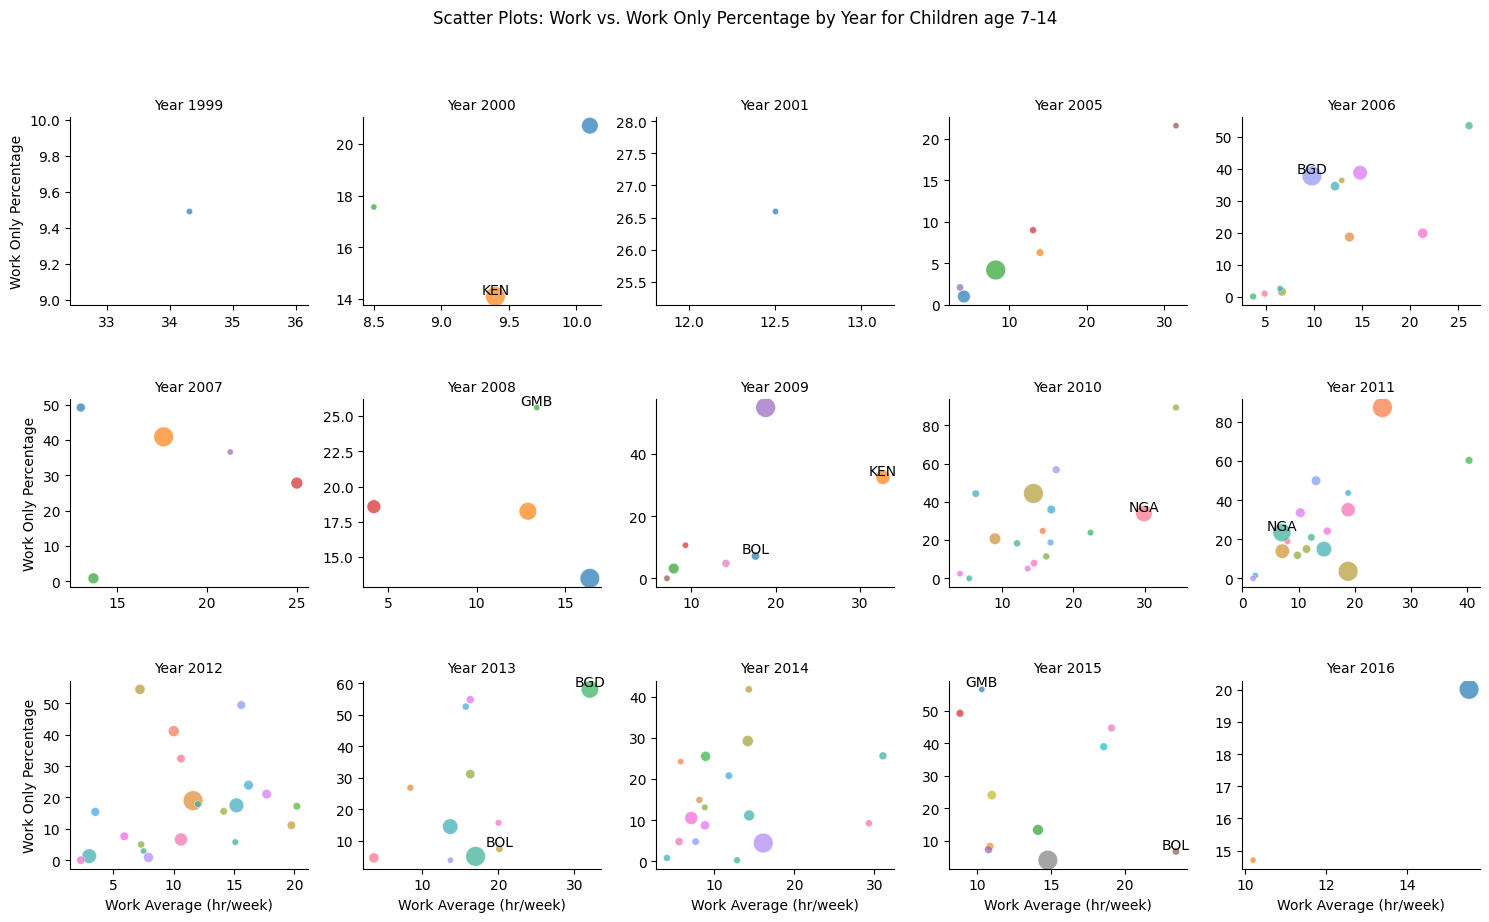

In [345]:
# Filter out the specific warning
warnings.filterwarnings("ignore", category=UserWarning, message="The figure layout has changed to tight")

# Create a FacetGrid of scatter plots
g = sns.FacetGrid(df_children_work, col='Year', col_wrap=5, height=3, sharex=False, sharey=False)
g.map_dataframe(
    sns.scatterplot,
    x='Work_avg',
    y='Work_only_pct',
    size='Population',
    hue='Country',
    sizes=(20, 200),
    alpha=0.7,
)

g.set_titles(col_template="Year {col_name}")
g.set_axis_labels('Work Average (hr/week)', 'Work Only Percentage')
g.fig.suptitle('Scatter Plots: Work vs. Work Only Percentage by Year for Children age 7-14', y=1.02)
plt.subplots_adjust(top=0.9, hspace=0.5) 

#let's track some countries
track_countries = ['Nigeria', 'Gambia', 'Bangladesh', 'Kenya', 'Bolivia']

# Iterate through subplots and add annotations
for ax in g.axes.flat:
    year = ax.get_title().split(' ')[-1]
    data_year = df_children_work[df_children_work['Year'] == int(year)]
    for _, row in data_year.iterrows():
        if row['Country'] in track_countries:
            annotation_text = f"{row['Code']}"  # Combine country and year
            ax.annotate(annotation_text, (row['Work_avg'], row['Work_only_pct']),
                        textcoords="offset points", xytext=(0, 2), ha='center')

plt.show()

Explain: For each country there is a color. We can see from the plot, there are so many colorful "bubbles" that represent the population proportion. Also, not all countries have children work data for each year. So, the overall trend of the data is inexplicable. Places like KEN, BGD, and GMB showed some interesting data. <br> 

For KEN, in year 2000, the work average is about 9.5 hrs and work only percentage is around 14 percent; in year 2009, the number for work avg jumped to 32 hrs and work only pct jumped to about 38 pct. <br>

For BGD, in year 2006, the work avg is 10 hrs and work only pct is 40; in year 2013, the work avg increased to 30 hrs and work only pct is 60! <br>

For GMB, in year 2008, the work avg is about 13 hrs and work pnly pct is 26; in year 2015, the work avg decrease to roughly 10.5 hrs per week but work only pct is 40 pct plus!<br>

We are showing this data to you because we think children working between age 7 - 14 could be an indication that their family is somehow financially unstable, which could lead the children to think that making money is worth more than education. Maybe this is inevitable for people born as being the n_th poor generation under some political system, carrying inequality arguments with them. By seeing the increase and decrease in work only pct, we start to wonder if people can see the value in education. 

### USA College Potential Salaries by State dataset EDA

To see people's motivation in education, one of the things is money. We found a dataset that can show the potential salary for some USA colleges after students graduate. Let's go. 

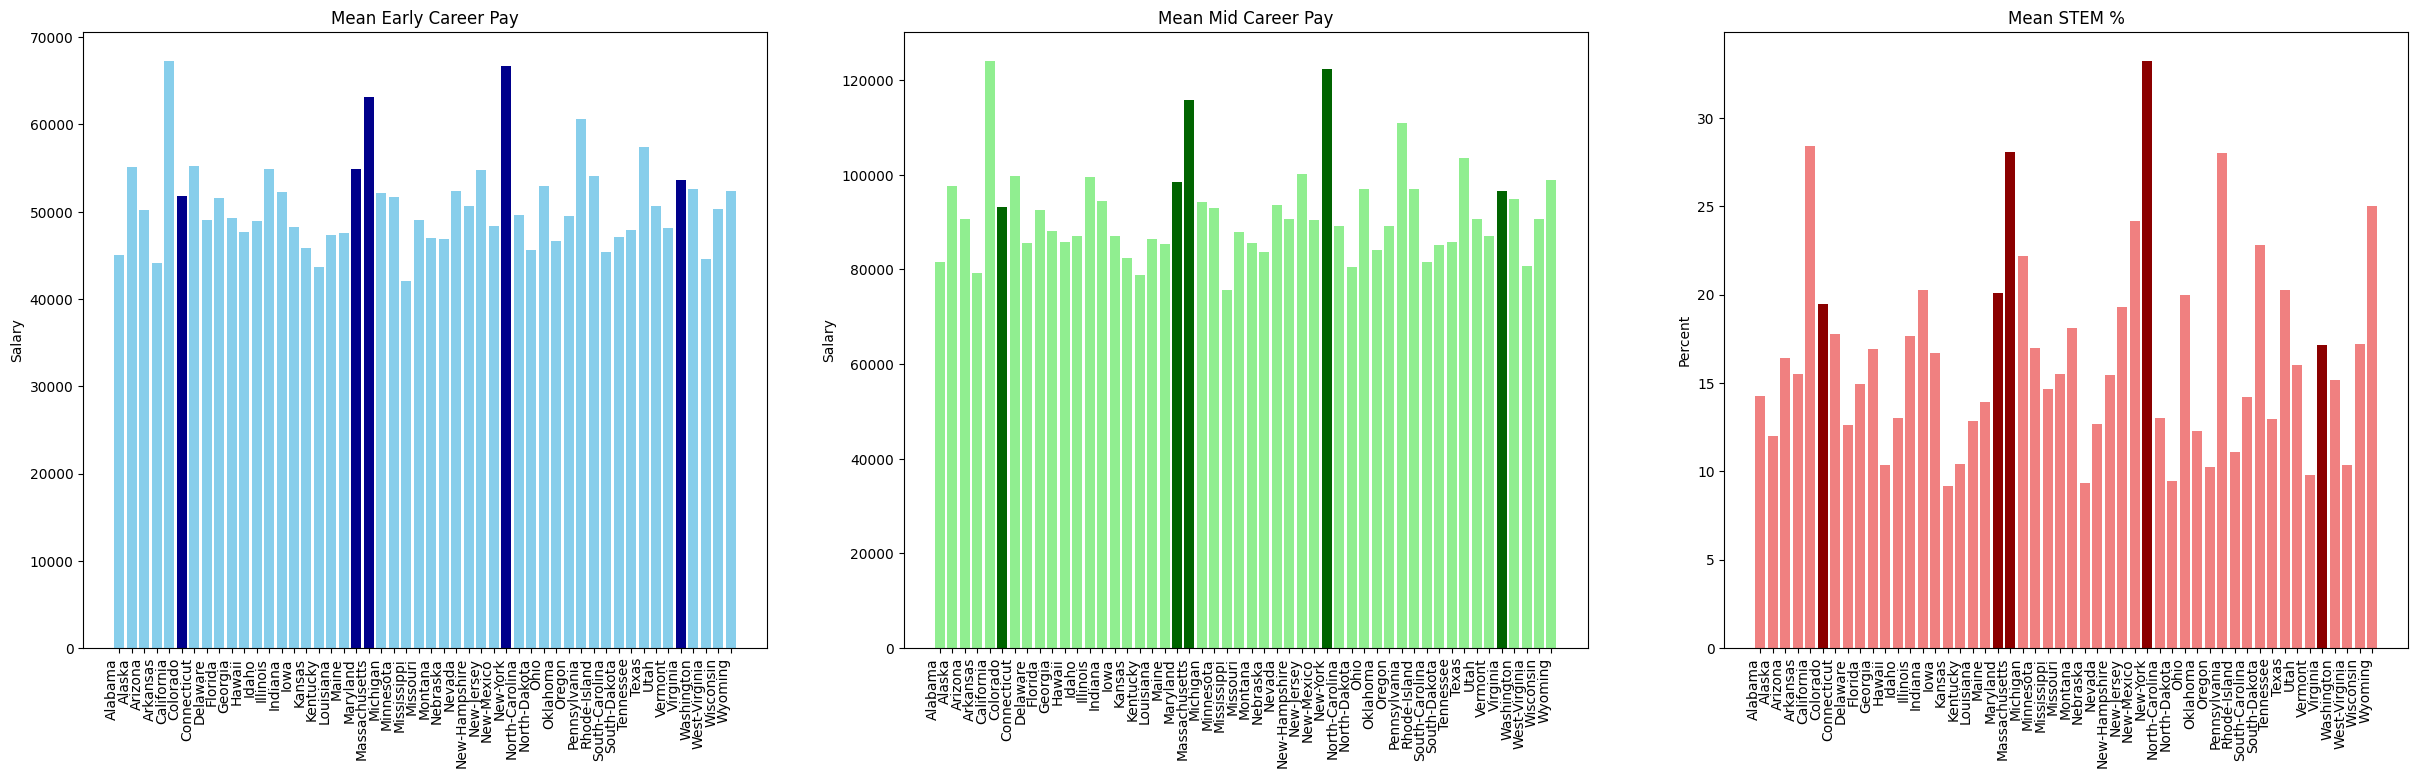

In [346]:
# We are more interested in the bigger picture, such as the State Data in the USA.
# We will extract some USA states we thought could be interesting to see since the education quality is well known.

targets = ['Maryland', 'Colorado',  'Massachusetts', 'Virginia', 'New-York']

# Calculate mean values for each state
mean_values = df_usa_salary_potential.groupby('state_name')[['early_career_pay', 'mid_career_pay', 'stem_percent']].mean().reset_index()

# Let's see some colorful plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))


bar_colors = ['skyblue' if state not in targets else 'darkblue' for state in mean_values['state_name']]
axes[0].bar(mean_values.index, mean_values['early_career_pay'], color=bar_colors)
axes[0].set_title('Mean Early Career Pay')
axes[0].set_ylabel('Salary')
axes[0].set_xticks(mean_values.index)
axes[0].set_xticklabels(mean_values['state_name'], rotation=90, ha='right')

bar_colors = ['lightgreen' if state not in targets else 'darkgreen' for state in mean_values['state_name']]
axes[1].bar(mean_values.index, mean_values['mid_career_pay'], color=bar_colors)
axes[1].set_title('Mean Mid Career Pay')
axes[1].set_ylabel('Salary')
axes[1].set_xticks(mean_values.index)
axes[1].set_xticklabels(mean_values['state_name'], rotation=90, ha='right')

bar_colors = ['lightcoral' if state not in targets else 'darkred' for state in mean_values['state_name']]
axes[2].bar(mean_values.index, mean_values['stem_percent'], color=bar_colors)
axes[2].set_title('Mean STEM %')
axes[2].set_ylabel('Percent')
axes[2].set_xticks(mean_values.index)
axes[2].set_xticklabels(mean_values['state_name'], rotation=90, ha='right')

# Show plot
plt.show()

Explain: the mean early potential salary for fresh college graduates are mostly in the range [40000, 55000]. Interestingly, California State has the highest average potential pay of all time, yet lower STEM percentage than New-York. By looking at our target states (the dark highlighted bars), the career pay for Maryland and Virginia colleges are about the same (little less than 100k); Maryland beats Virginia with the STEM percentages being higher. Massechusetts have a pretty high range from each of the plot [~80500, ~115000, ~27 pct]. Colorado is relatively lower than other states for salaries. While some states in the USA looks attracting to us, we encourage you to explore this financial aspect because it could be insightful. It seems like going to college can make descent money because we can learn something we couldn't on our own. To extend this idea, let's learn about college diversity.<br>


### USA College Enrollment rate & Ethnicity Enrollment Rate dataset EDA

We will look at the USA college enrollment rate data to see how college enrollment could reflect on something. 

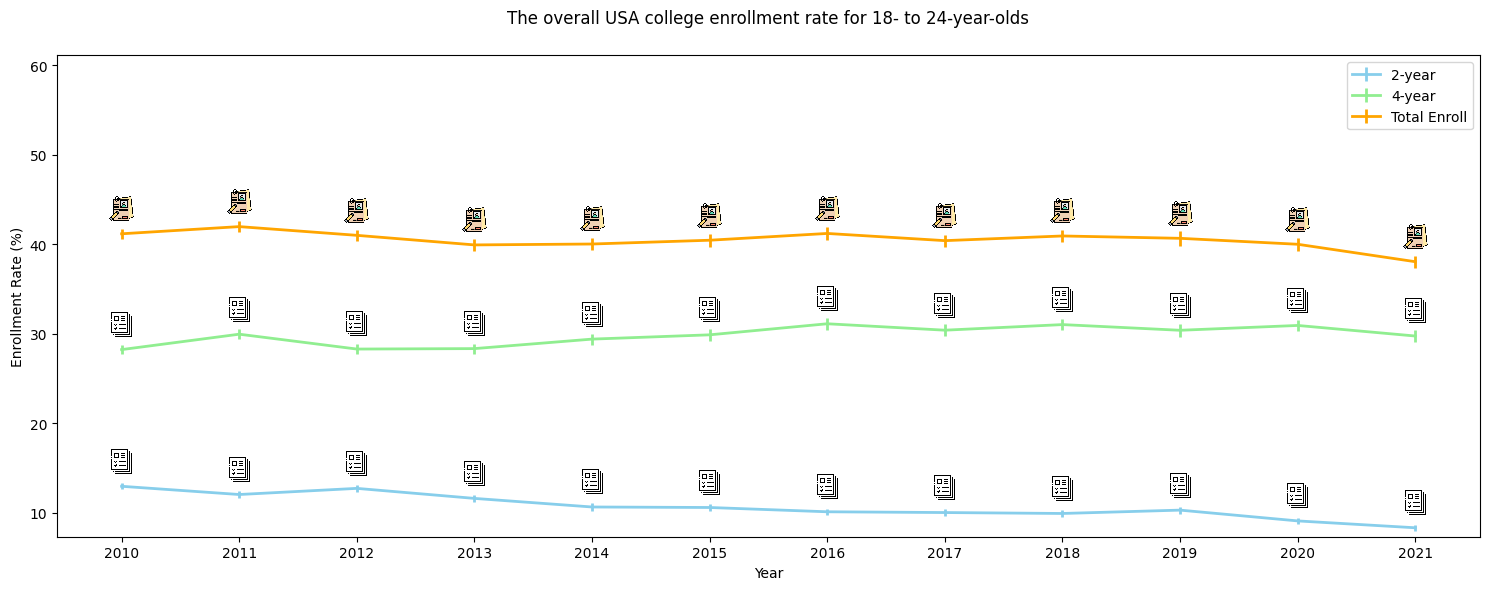

In [347]:
# Set up the plot
plt.figure(figsize=(15, 6))

# Load custom marker images
img_2_year = plt.imread('./marker1.png')
img_4_year = plt.imread('./marker1.png')
img_total = plt.imread('./marker2.png')

# Plot the lines
plt.errorbar(df_usa_college_enroll_rate['Year'], df_usa_college_enroll_rate['2-year'], 
             yerr=df_usa_college_enroll_rate['2-year-Standard Error'], 
             marker='', color='skyblue', linewidth=2.0, label='2-year')

plt.errorbar(df_usa_college_enroll_rate['Year'], df_usa_college_enroll_rate['4-year'], 
             yerr=df_usa_college_enroll_rate['4-year-Standard Error'], 
             marker='', color='lightgreen', linewidth=2.0, label='4-year')

plt.errorbar(df_usa_college_enroll_rate['Year'], df_usa_college_enroll_rate['Total'], 
             yerr=df_usa_college_enroll_rate['Total-Standard Error'], 
             marker='', color='orange', linewidth=2.0, label='Total Enroll')

# Add custom markers for 2-year and 4-year using AnnotationBbox
for year, y2, y4, total in zip(df_usa_college_enroll_rate['Year'], df_usa_college_enroll_rate['2-year'], 
                               df_usa_college_enroll_rate['4-year'], df_usa_college_enroll_rate['Total']):
    ab_2_year = AnnotationBbox(OffsetImage(img_2_year, zoom=0.035), (year, y2 + 2.8), frameon=False)
    plt.gca().add_artist(ab_2_year)
    ab_4_year = AnnotationBbox(OffsetImage(img_4_year, zoom=0.035), (year, y4 + 2.8), frameon=False)
    plt.gca().add_artist(ab_4_year)
    ab_total = AnnotationBbox(OffsetImage(img_total, zoom=0.035), (year, total + 2.8), frameon=False)
    plt.gca().add_artist(ab_total)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Enrollment Rate (%)')
plt.title('The overall USA college enrollment rate for 18- to 24-year-olds', y=1.05)
plt.legend()

plt.ylim(min(df_usa_college_enroll_rate['2-year']) - 1, max(df_usa_college_enroll_rate['4-year']) + 30)
plt.grid(False)
plt.tight_layout()
plt.show()


Explain: from year 2010 to 2021, the 2-year college enrollment dropped from 14 percent-ish to blow 10 percent, and the 4-year college enrollment maintains up and down on the 30 percent line. The overall college enrollment seems to decrease from 2018 to 2021 overtime. To our surprise, it looks like going to college is like a priviledge in the US because in the course of 10 years, the college enrollment rate is always less than 50 percent! Perhaps it is the money that is driving young people away even though the potential early career and mid career salary is descent (common sense). We couldn't find the financial pice from this same dataset. You see, if we are data scientists in the wild, it is always a good idea to first figure out what kinds of data do we want to get. That way, at least, we will have strong supporting evidences. So maybe the potential salary motivation has less effect on this indirectly.     

We learned about the overall enrollment rates. Now a common thing to futher explore is the diversity of the data, such as the enthnicity of the population. Why? It is because USA is a very diverse country (melting pot). Thus, we present to you:

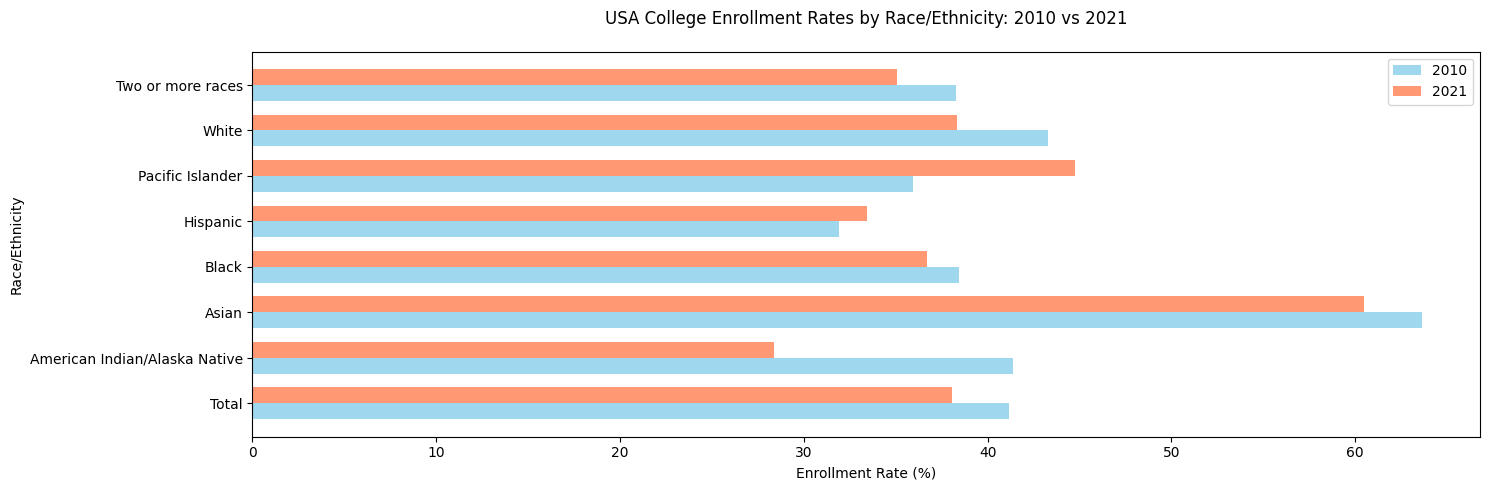

In [348]:
# Set up the plot
plt.figure(figsize=(15, 5))

# Calculate the width of each bar group
bar_width = 0.35

# Create positions for the bars
positions_2010 = list(range(len(df_usa_college_enroll_rate_enthnicity)))
positions_2021 = [pos + bar_width for pos in positions_2010]

# Plot the bars for 2010 and 2021
plt.barh(positions_2010, df_usa_college_enroll_rate_enthnicity['2010'], 
         height=bar_width, color='skyblue', alpha=0.8, label='2010')

plt.barh(positions_2021, df_usa_college_enroll_rate_enthnicity['2021'], 
         height=bar_width, color='coral', alpha=0.8, label='2021')

# Set y-ticks and labels
plt.yticks([pos + bar_width / 2 for pos in positions_2010], df_usa_college_enroll_rate_enthnicity['Race'])

# Customize the plot
plt.xlabel('Enrollment Rate (%)')
plt.ylabel('Race/Ethnicity')
plt.title('USA College Enrollment Rates by Race/Ethnicity: 2010 vs 2021', y=1.05)
plt.legend()
plt.grid(False)
# Display the plot
plt.tight_layout()
plt.show()

Explain: from the same dataset as college enrollment rate from 2010 to 2021 ages 18-24, we see that Asian have the hightest enrollment rate of all time (60 pct +). Then comes White and Pacific islander (~ 40 pct avg). Black is just slightly less than 40 percent in avg. Perhaps Asians are more prone to be "high college grades equals successful"? Even that is the case, we doubt this could make an Asian student successful in education. Because focusing souly on grades will be really stressful. Whether people view college as a resource, a place to show intelligence, a factory to produce high quality labors, or a self-improvement place, these chaotic thoughts will be transformed and become "temporarily ordered" by schools; that is, you will learn how things work, what is best or worse, what other people are thinking, etc. <br> 

### Malaysia College Student Mental Health dataset EDA

Here, we will see the mental aspect in education. Enjoy :) 

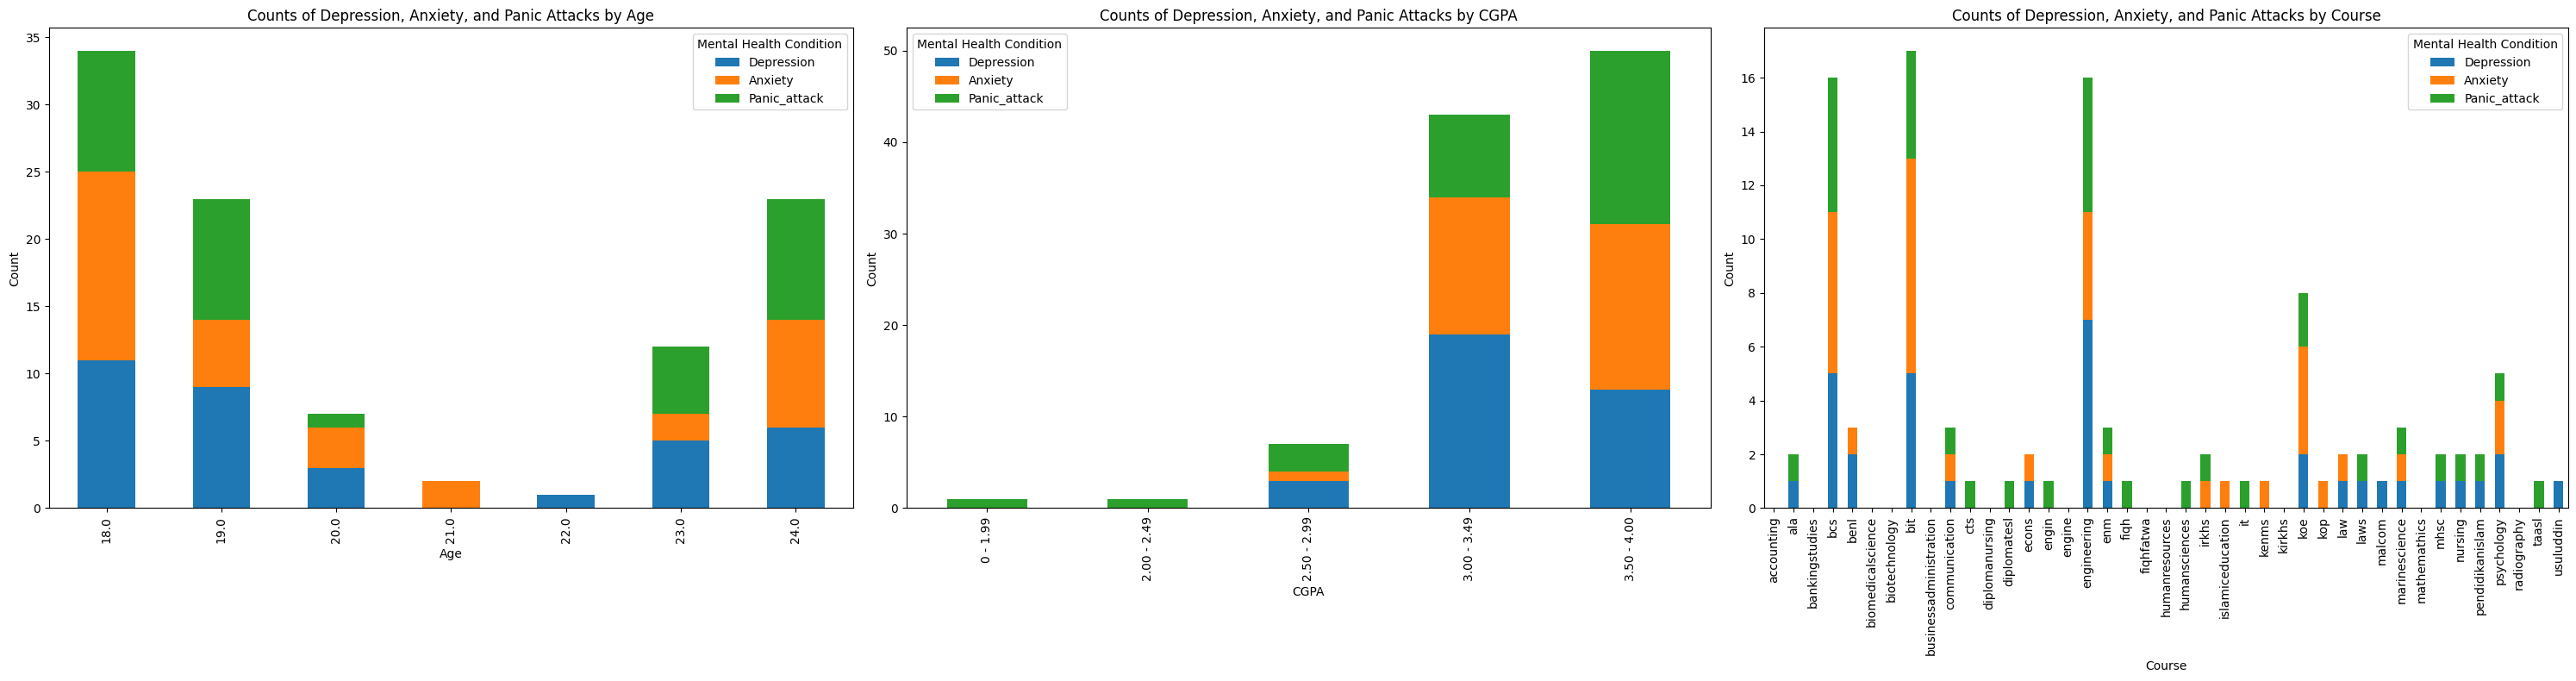

In [349]:
df_malaysia_copy = df_malaysia_student_mental_health.copy()

# See the sum counts of Age and CGPA
grouped_age = df_malaysia_copy.groupby(['Age']).sum().reset_index()
grouped_cgpa = df_malaysia_copy.groupby(['CGPA']).sum().reset_index()
grouped_course = df_malaysia_copy.groupby(['Course']).sum().reset_index()

# Create a list of groupings and their corresponding dataframes
groupings = [('Age', grouped_age), ('CGPA', grouped_cgpa), ('Course', grouped_course)]

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

for i, (group_name, grouped_df) in enumerate(groupings):
    ax = axes[i]
    stacked_cols = ['Depression', 'Anxiety', 'Panic_attack']
    grouped_df.plot(ax=ax, x=group_name, y=stacked_cols, kind='bar', stacked=True)

    ax.set_xlabel(group_name)
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Depression, Anxiety, and Panic Attacks by {group_name}')
    ax.legend(title='Mental Health Condition')

# Adjust layout and display the plot
plt.grid(False)
plt.tight_layout()
plt.show()

Explain: the data plot shows us very interesting results! To be honest, our intuition for CGPA is: students will get really stressful with low scores, resulting depression. It turns out for students from International Islamic University Malaysia in year 2020 who has [0 - 1.99], [2.00 - 2.49], and [2.50 - 2.99] CGPA ranges have less mental health issues compared to students in the [3.00 - 3.49] and [3.50 - 4.00] ranges. It seems like to be "successful" in college in this case (high grades) is actually not successful in terms of mental health because students care too much to an extend grades become greater than other stuffs; otherwise, they wouldn't possibly be descently depressed, anxious, and paniced. <br>

Normally, a student will go to college at the age of 18 and then graduate college at 22 (typical 4-year college life). It looks like students at the age of 18 and 19 in college is suffering a lot of mental health problems. It is because they are not "mature enough" to handle the college life, such as living away from home or figuring out the college course load? Students who are 20, 21, and 22 have a decrease of mental health problems. Perhaps they have a clearer path they want to work on, so less stress? The intuitive age for graduate students is 23 and 24, so we will probably see depression and anxiety here. However, without more data, we couldn't come up with more reliable testing on our assumptions.<br>

When we look at the courses, bcs, bit, engineering, koe, and psychology stood out to our sight. Although we have no idea what bcs, bit, and koe means here even when we went to the university's website to check, it is expected to see engineering to be one of the anxious causing course. Do grades really make a student success, such as getting the potential salary out of the school? Of course, we all need money to survive, but does having the luxury to spend the money and time to attend college implies students are "successful" in the temporarily financial stable sense? Remember, we care only the education life. For outside school, the situation varies a lot lot lot. So far as we can see, the way students might see "success" in education v.s the way we start to see "success" in education is different. Maybe learning to enjoy at the moment is what makes us success. 

### USA Youth Violence History dataset EDA

Violence is one of the least things we want to encounter during our school years. Threats will always be there; thus, being able to face threats is one way to be "successful" in education. The data we are using here will show you the threats statistics. 

,Other_violent_deaths,Homicides,Suicides
count,27.000000,27.000000,27.000000
mean,45.629630,22.444444,5.777778
std,8.000712,7.924322,2.292686
min,32.000000,10.000000,1.000000
25%,38.500000,17.000000,4.500000
50%,47.000000,21.000000,6.000000
75%,50.000000,30.000000,7.500000
max,63.000000,35.000000,10.000000


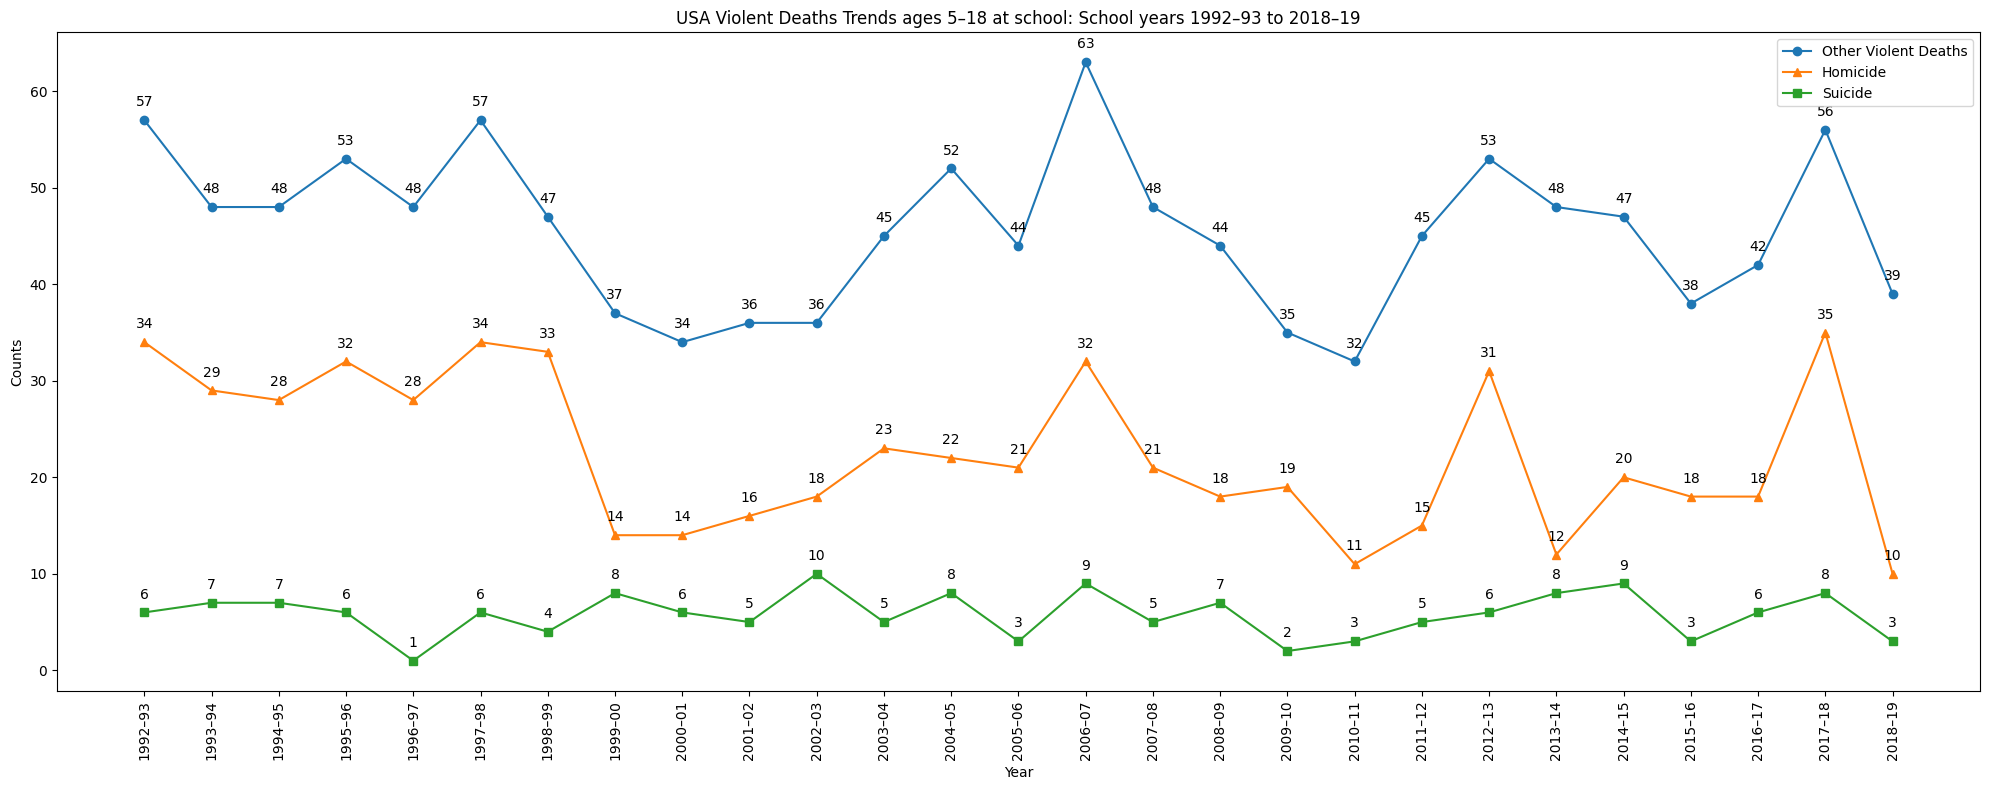

In [350]:
display(df_usa_youth_violence_history.describe())
# Plotting
plt.figure(figsize=(20, 8))

# Line plot for each column
plt.plot(df_usa_youth_violence_history['Year'], df_usa_youth_violence_history['Other_violent_deaths'], marker='o', label='Other Violent Deaths')
plt.plot(df_usa_youth_violence_history['Year'], df_usa_youth_violence_history['Homicides'], marker='^', label='Homicide')
plt.plot(df_usa_youth_violence_history['Year'], df_usa_youth_violence_history['Suicides'], marker='s', label='Suicide')


# Add count number annotations for each point
for index, row in df_usa_youth_violence_history.iterrows():
    plt.annotate(f'{row["Other_violent_deaths"]}', (row['Year'], row['Other_violent_deaths']), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{row["Homicides"]}', (row['Year'], row['Homicides']), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{row["Suicides"]}', (row['Year'], row['Suicides']), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('USA Violent Deaths Trends ages 5–18 at school: School years 1992–93 to 2018–19')
plt.legend()
plt.xticks(rotation=90)
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


Explain: Other violence Deaths are always higher than homicides and suicides. While life is wonderful (including good and bad events), behind numbers for suicide is hiding some students' pain. Maybe they weren't guided correctly. From 1992 to 1999, we see an overall decrease in homocide from 34 to 14 end points, but from 1999 to 2006, the number increases. There was a huge jump up of homocides in 2017-18 (36) and a huge jump down in 2018-19 (10). We don't believe there is any linear relationship for year and the number of Other violence Deaths, Homicides, and Suicides as the std shows the data is varied. 

### Drug Abuse Statistics dataset EDA

Drugs. No doubt it is a factor that can influence students negatively in education, making students fail.

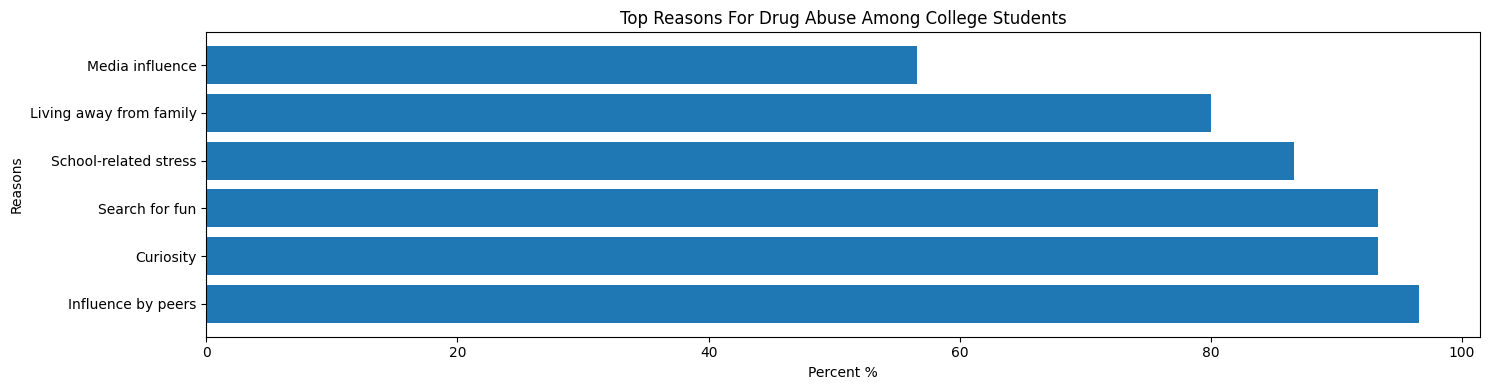

In [351]:
plt.figure(figsize=(15, 4))
plt.barh(df_drug_abuse_reasons['Reason'], df_drug_abuse_reasons['Percent'])
plt.xlabel('Percent %')
plt.ylabel('Reasons')
plt.title('Top Reasons For Drug Abuse Among College Students')
plt.tight_layout()
plt.show()

Explain: it turns out 90 percent plus students do drugs because of their peers. It could indirectly show that students haven't developed a mind set of having their own logical thinking of the consequences. Curiosity and search for fun is the nature of ignorant students. Living away from family could be the factor to cause the student to do drugs, whether this is showing the disagreement, rebellion, or a-way-to-escape, the emotion here dominates the reasoning mind. Media influence is something interesting to know. Perhaps the educators failed to inform students bad things about drugs. For your own exploration, we hope you could find something interesting by extending this dataset. 

### Europe College Student Info dataset EDA

For this dataset, we would show you a basic plot. For more visualizations on this dataset, see Step 4 below.

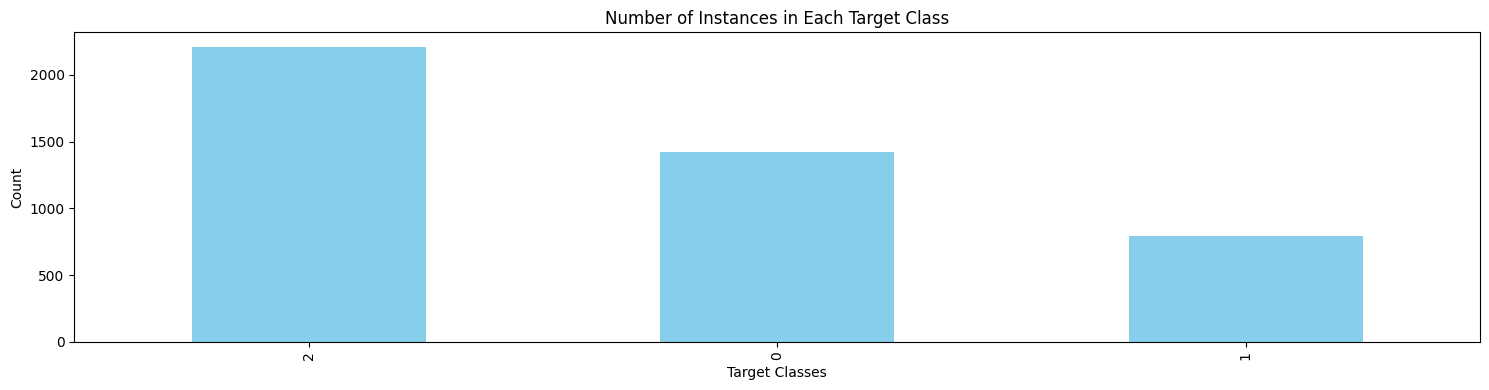

In [352]:
df_europe_copy = df_europe_students.copy()

# Counting the number of classes in 'target'
class_counts = df_europe_copy['Target'].value_counts()

# Plotting a bar plot
class_counts.plot(kind='bar', figsize=(15, 4), color='skyblue')

# Adding labels and title
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Number of Instances in Each Target Class')
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()

Interestingly we have a dataset of "successful" students based on graduation. It is also interesting to see that dropouts are about 1500 while graduate is about 2200. In the dataset, there is a Target (enrollment status) and Age at Enrollment column. Let's see what could happen if we plot them together.

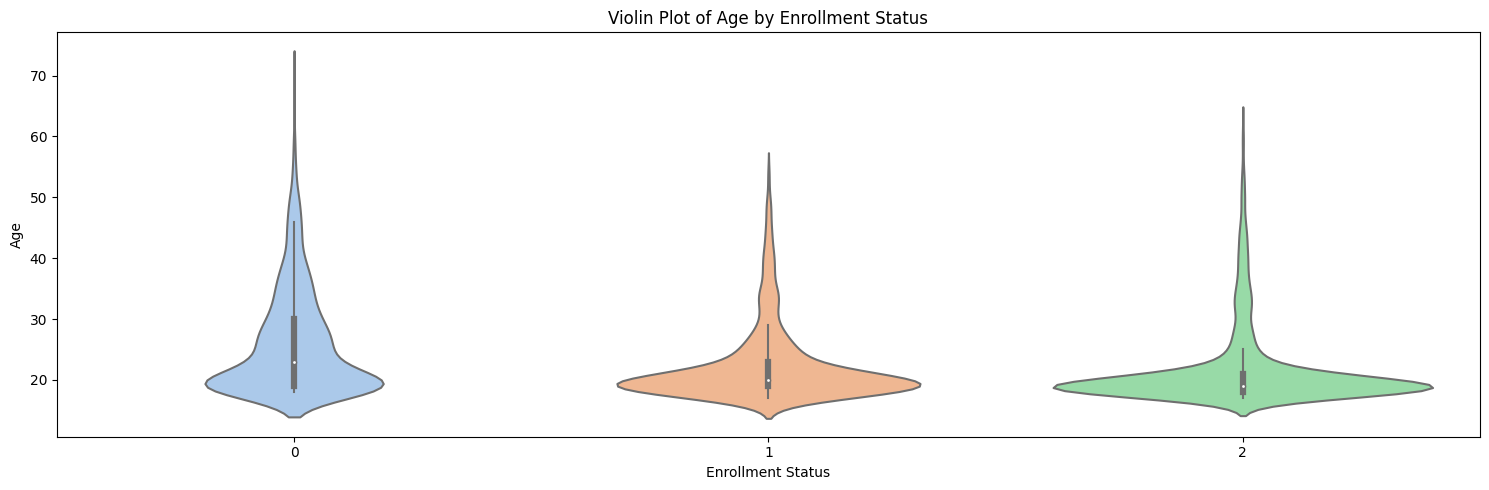

In [353]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df_europe_students, x='Target', y='Age at enrollment', palette='pastel')

# Adding labels and title
plt.xlabel('Enrollment Status')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Enrollment Status')

# Display the plot
plt.tight_layout()
plt.show()

Explain: from the age violin plot, we see that the median is about 20 years old. People who are 17 - 20 years old are enrolled in college, and 19 - 24 years old graduated. People who are older about 25 years older tend to dropout less, and people who are younger tend to dropout more. The data is unsurprisingly skewed to younger people. 

## Step 4: Model: Analysis, Hypothesis Testing, & ML

The Europe student dataset was quite extensive originally coming with 36 features available to us. We trimmed off a few columns during Step 2 and will now build a variety of machine learning models learned throughout the course of CMSC320 to try and accurately classify an individual as a dropout, student, or graduate. 

As a preliminary step, let's first verify the target label has changed from type object to integer. This was performed in Step 2 and acts as an encoding for our three categories (dropout, student, graduate). This is necessary because some algorithms depend on it and cannot operate with categorical or string-based labels. 

In [354]:
df_europe_students.dtypes

Marital status                           int64
Application mode                         int64
Application order                        int64
Course                                   int64
Daytime/evening attendance               int64
Previous qualification                   int64
Nacionality                              int64
Mother's qualification                   int64
Father's qualification                   int64
Mother's occupation                      int64
Father's occupation                      int64
Displaced                                int64
Educational special needs                int64
Debtor                                   int64
Tuition fees up to date                  int64
Gender                                   int64
Scholarship holder                       int64
Age at enrollment                        int64
International                            int64
Unemployment rate                      float64
Inflation rate                         float64
GDP          

Great! Here we can observe the uniform data type of each feature and can note that the target feature is represented as an integer. Onto the next step!

A correlation matrix, sometimes called a heatmap, is an extremely valuable tool in data analysis and what we'll implement first. This is a square matrix that houses the correlation coefficient pairings between each feature in a particular dataset. Here, we'll be able to observe what features are positively, negatively, or not correlated meaning how they tend to change relative to each other. 

Let's generate a correlation matrix to get an insight into how our features behave together. 

Text(0.5, 1.0, 'Correlation Matrix')

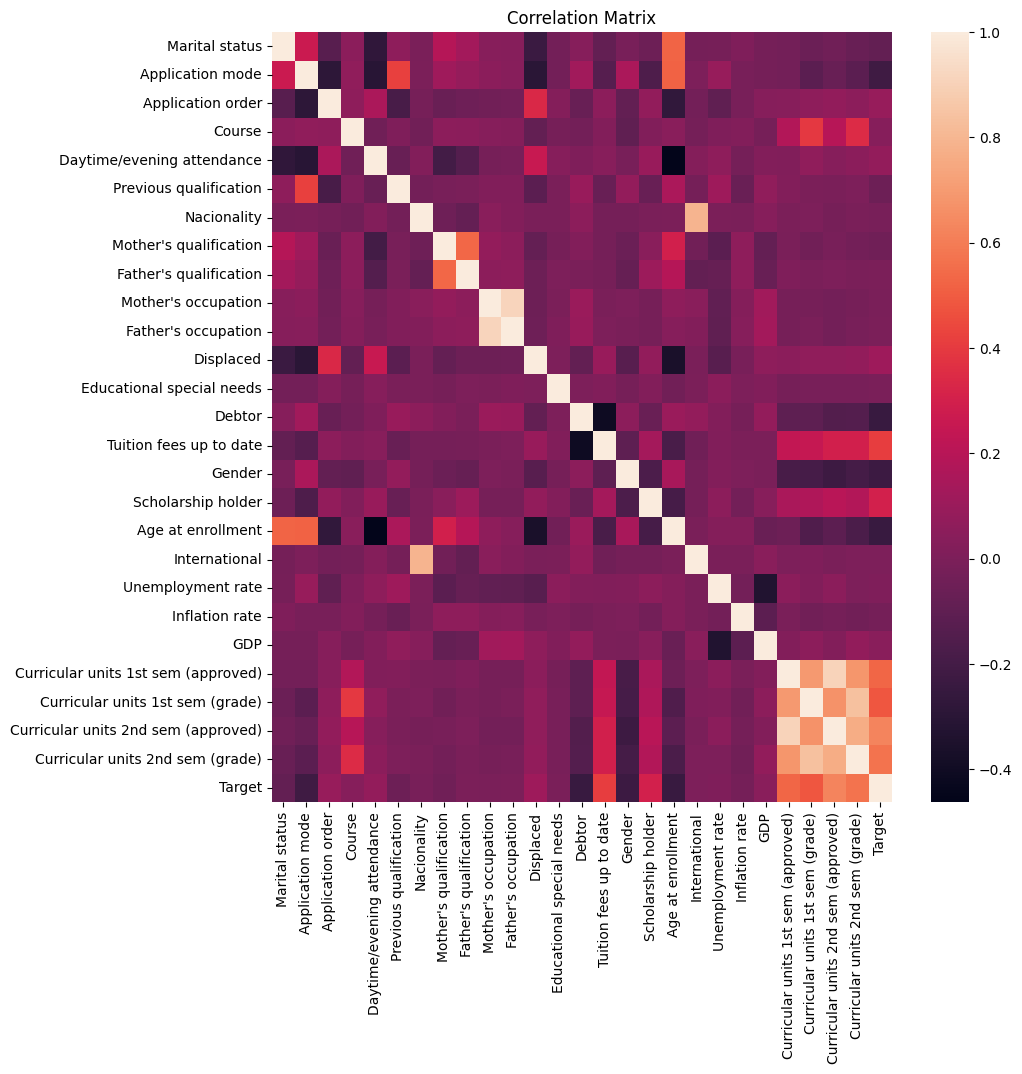

In [355]:
corr_matrix = df_europe_students.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')

Alright, here's the correlation matrix we wanted! Correlation matrices are also often called heatmaps and the 'temperature' indicates the correlation between features mentioned above. This is a great first insight into the inner workings of the dataframe and we can see that most features are either not correlated or negatively correlated amongst each other. In a real world setting, this is to be expected and a practical result. 

We've just generated a nxn correlation matrix, but what might help us more specifically is to hone in on the relationship between our features and target label specifically. Let's create a new visualization to model this. 

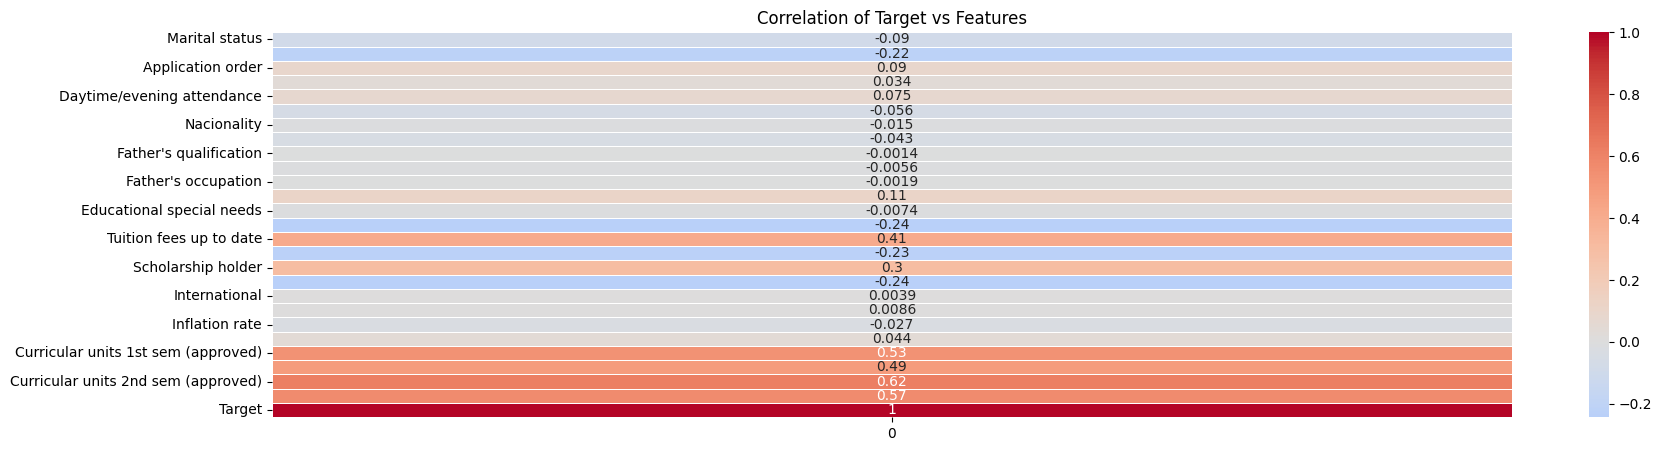

In [356]:
target_corr = df_europe_students.corrwith(df_europe_students['Target'])
plt.figure(figsize=(20, 5))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation of Target vs Features')
plt.show()

Now, we have another heatmap generated that is nx1 and models the relationship between each feature and our target. Based on the results of the heatmap, we can extract the k highest correlated features to our target label.

An important distinction to first make is while correlation does not imply causation, we can still reason as to why we believe these trends to be occurring with that caution in mind. 

In [357]:
# Set the value of k (number of highest correlations to extract)
k = 10

target_corr = corr_matrix['Target']
target_corr = target_corr.sort_values(ascending=False)[1:(k + 1)]

print("Top", k, "highest correlations:")
print(target_corr)

Top 10 highest correlations:
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Tuition fees up to date                0.409827
Scholarship holder                     0.297595
Displaced                              0.113986
Application order                      0.089791
Daytime/evening attendance             0.075107
GDP                                    0.044135
Name: Target, dtype: float64


The output above gives us some insight into the features most strongly correlated to our target label. One might infer academic performance and grades play a strong influence into student retention. We're also able to see other trends like areas of finance (i.e. tuition, scholarship, living conditions) having some form of association. 

Naturally, we can reason as to why this is. If an individual is unable to perform at the needed academic level and keep up with course rigor, they're more inclined to leaving schooling. Similarly, the cost of higher education has seen a significant increasing trend across several years, making aid such as scholarships more and more in demand. If students are unable to manage and keep up with their finances, they have no choice but to forgo their studies. 

Across CMSC320, we've learned an abundance of preliminary machine learning algorithms to perform classification, regression, clustering when needed on different datasets. Making use of Scikit-learn library and their pre-implemented models, we will run various algorithms like KNN (K-nearest neighbors), SVM (Support Vector Machines), logistic regression, decision trees, and random forests on the Europe student dataset. 

To begin building said models, we need to split our dataset into training and testing subsets. The X training and testing data are feature vectors without their corresponding label. The y training and testing data are said corresponding labels for each of those observations. 

There are trade-offs to the size of our training/testing split but we will opt to use the conventionally standard 80/20 metric where 80% is used to train and 20% is used to test. 

In [358]:
X = df_europe_students.drop('Target', axis=1)
y = df_europe_students['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

First, we will try K-nearest neighbors. This algorithm works by reasoning that data points with similar features tend to belong to the same classification. It finds the "k" nearest data points to an input with a given distance metric (i.e., Euclidean distance) and then takes the majority of the neighbors' labels to classify the input. 

In [359]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbor Accuracy: {accuracy}")

K-Nearest Neighbor Accuracy: 0.615819209039548


Here, we can observe that the accuracy of KNN isn't as high as we'd like it to be. This could be due to a number of reasons such as choosing an appropriate value of k. Choosing k is rather nuanced and here we're using an arbitrary number, five. 

One thing to highlight is that our KNN model may be suffering from a phenomenon known as the "curse of dimensionality." KNN's performance can degrade as the number of features (dimensions) in the dataset increases. In high-dimensional spaces, data points tend to be more spread out, making it difficult to find meaningful nearest neighbors. 

This aligns with our dataset which originally started with 36 features which we trimmed down during data processing. If we kept all 36 original features, we may have observed even worse performance from the model.

Next, we will try to use logistic regression. Conventionally, logistic regression is a binary classifier algorithm. However, there is such thing as multiclass logistic regression, also known as softmax regression, which Scikit-learn defaults to when necessary. Essentially, it predicts the probability of each class for some input and uses the sofmax function to normalize the probabilities so they all add up to 1. The class with the highest probability gets predicted as the final output!

In [360]:
logreg_model = LogisticRegression(solver='liblinear')

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.7367231638418079


We see a significant improvement with our logistic regression model! One thing to note is that logistic regression tends to perform well when there is a well-balanced representation of classes amongst our examples in the dataset. As observed in Step 2, there is a rather uneven split of graduates, dropouts, and lastly enrolled students when it comes to the frequency of their class representation. If we could better balance this, perhaps if the study surveyed more people, we could see even better results. 

Another model we can try is SVM (Support Vector Machines). In particular, we will use multiclass SVM to align with our three classifiers (dropout, enrolled, graduate). Standard SVM extends a hyperplane, or in laymans' terms, a divider to apply a binary classification on the dataset. In a two-dimensional space, this can be thought of as a dividing line where you either are or are not something. 

Multiclass SVM extends this logic and extends a hyperplane for each class as needed. Let's see how it performs!

In [361]:
def run_svm(model):
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"SVM Accuracy with {svm_model.kernel}: {accuracy}")

svm_model = SVC(C=1.0)
run_svm(svm_model)
svm_model.kernel = 'linear'
run_svm(svm_model)

SVM Accuracy with rbf: 0.488135593220339
SVM Accuracy with linear: 0.7389830508474576


Wow, we're getting two **very** different results here! But first... what are rbf and linear?

These are what we call **kernel** functions and are an important part of how SVM models operate. When a hyperplane can't be cleanly established on a dataset, we might need to apply a kernel function. This is a mathematical function that maps data points from their original feature space to a higher dimensionality. A good example of this is if we were working on a 2-dimensional feature space and our data points were jumbled up, we may not be able to draw a line that perfectly separates our different classes. A kernel function could extend these data points to a three dimensional plane such that we can more easily do this! In other words, a kernel function gives us an extra layer of flexibility when our datasets are proving slightly difficult to work with!

By using a linear kernel function, we're able to observe a much better result than the default rbf kernel!

Another fun model to try is what's called a decision tree. We can almost think of this as a flowchart where the internal nodes represent a decision our model makes based on a specific feature. We'll see this flowchart in a little bit! This leads to branches that represent outcomes or further decisions. 
At the end of the branches, you find the predicted outcome or classification based on the path taken through the tree.

In [362]:
dt_model = DecisionTreeClassifier(criterion="entropy")

dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy Score: 66.67%


Yikes! This isn't looking too good. Something to mention is that because of the 'flowchart' nature of the decision tree algorithm, there's a very important constraint we have control of called the max depth. Essentially, we'll able to control how tall our tree gets. This is especially important for large datasets like ours where we have an abundance of features and observations.

Not to mention, if we let the algorithm decide on a depth of its own, we get a **really**, **really** confusing tree. Let's look at that for a minute.

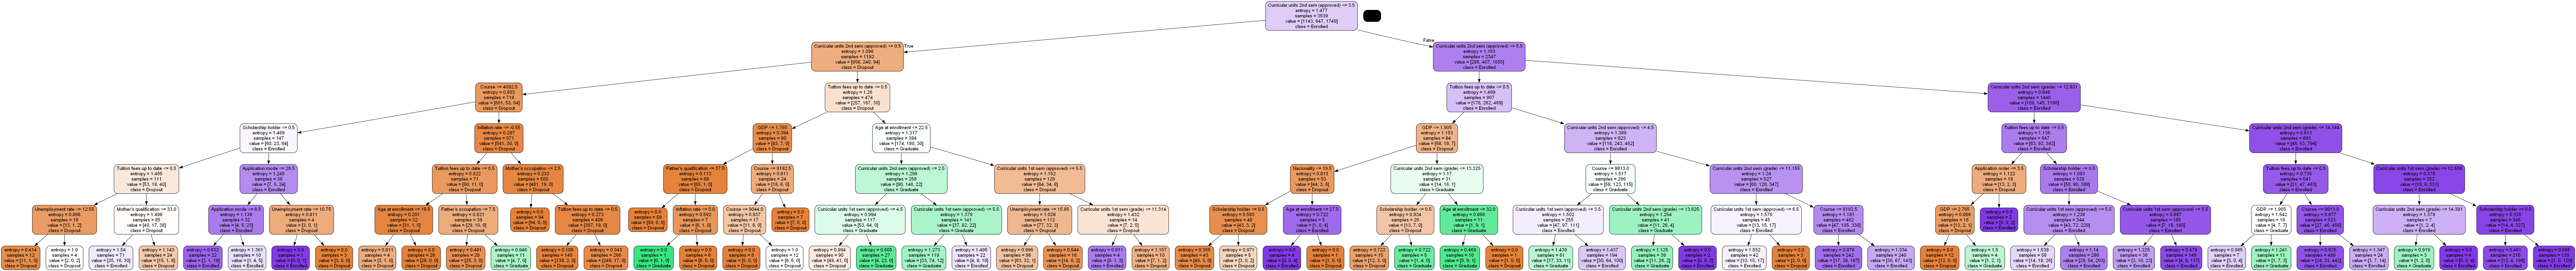

In [363]:
feature_cols = df_europe_students.drop('Target', axis=1).columns

dot_data = export_graphviz(dt_model, out_file=None, feature_names=feature_cols, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Not too pretty right? Let's pick a max depth that makes this easier on the eyes. 

In [364]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy Score: 72.20%


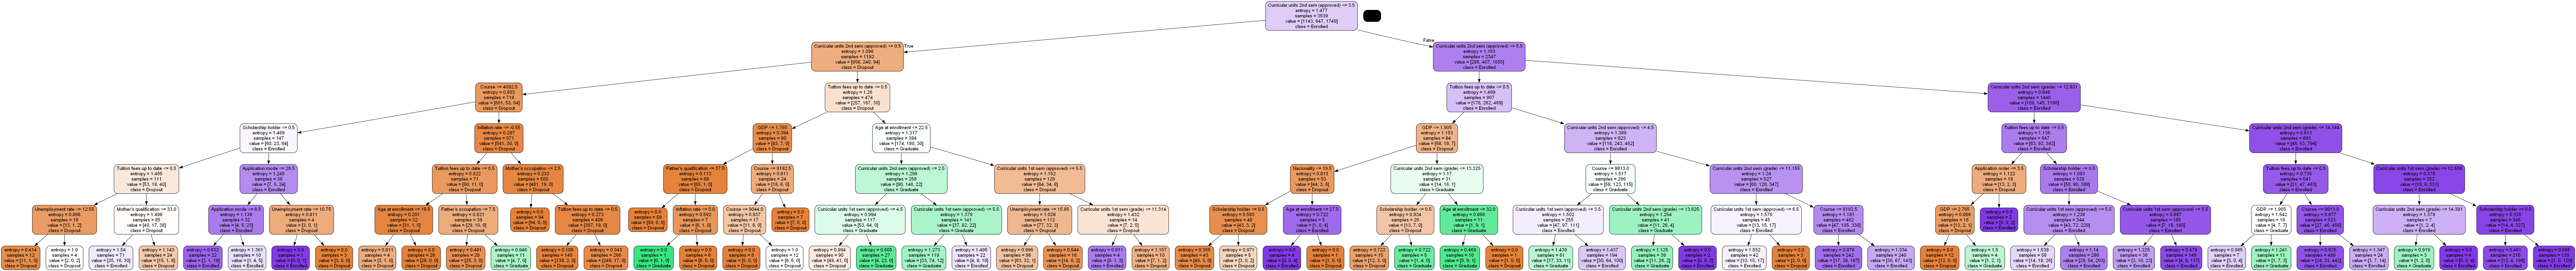

In [365]:
feature_cols = df_europe_students.drop('Target', axis=1).columns

dot_data = export_graphviz(dt_model, out_file=None, feature_names=feature_cols, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [366]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.7638418079096045


In [367]:
# TODO: Remove this cell for final submission, just for testing purposes and optimizing the model
# To optimize random_state and max_depth
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'random_state': randint(0, 101),  # Random values between 0 and 100
    'max_depth': range(1, 11)  # Range of max_depth values from 0 to 10
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(criterion="entropy"),
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,  # Number of cross-validation folds
)

random_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params, best_score)

{'max_depth': 5, 'random_state': 21} 0.7389127290453016
